In [40]:
# Hackathon
# !pip install pandas
# !pip install numpy
# !pip install tensorflow
# !pip install scikit-learn
# !pip install os
# !pip install tranformers
# !pip install pillow
# !pip install matplotlib
# !pip install keras
# !pip install model
# !pip install torch
# !pip install torchvision

In [3]:
# Loading the neccessary packages used throughout model training.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import torch
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import io
import pickle
from google.colab import files
import os
from sklearn.impute import SimpleImputer

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Creating a temporary file storage & working directiory for projection & reports data
uploaded_files_for_AI_project = files.upload()
print(os.listdir("/content/")) #Verifying wether they were successfully uploaded

Saving main_data.txt to main_data.txt
Saving patient_ids_scleroderma.txt to patient_ids_scleroderma.txt
['.config', 'drive', 'patient_ids_scleroderma.txt', 'main_data.txt', 'sample_data']


In [6]:
patiedn_id = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/health_hackakthon_2/patient_ids_scleroderma.txt", sep='\t')
main_text = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/health_hackakthon_2/main_data.txt", sep='\t')

In [7]:
merged = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/health_hackakthon_2/SclerodermaCombined.xlsx")

In [8]:
merged['Scleroderma present'] = merged['Scleroderma present'].str.strip().str.capitalize()
merged['Scleroderma present'] = merged['Scleroderma present'].map({'Yes': 1, 'No': 0})

In [29]:
# Creating a Logistic Regresssion to see which symptom is the best predictor of screlemoma
x = merged.drop(columns=['id patient', 'Scleroderma present'])
x = x.select_dtypes(exclude=['datetime64[ns]'])
x = pd.get_dummies(x, dummy_na=True)  # Includes NaNs/"Unknown" as a separate column
y = merged[('Scleroderma present')]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Imputing the missing data
imputer = SimpleImputer(strategy='mean')  # or 'median'/'most_frequent'
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Traning the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_imputed, y_train)

#Predicinting and evaluting the model
y_pred = model.predict(X_test_imputed)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# Feature names come from your training set (after get_dummies)
feature_names_ = X_train.columns
# Get model coefficients
coefficients_ = model.coef_[0]

# Create a DataFrame with coefficients
coef_df2 = pd.DataFrame({
    'Feature': feature_names_,
    'Coefficient': coefficients_,
    'Abs_Coefficient': np.abs(coefficients_)
})

# Sort by the absolute value of the coefficient
top_predictors_ = coef_df2.sort_values(by='Abs_Coefficient', ascending=False)

# Show the top predictors
print("Top predictors of Scleroderma:")
top_predictors_.head(20)

# Results the best predictors of Scleroderma  are with weak coefficinets arount 0.3 or 0.26,
# thereby indicating the likelihood

#Skin thickening of the whole finger distal to MCP (Sclerodactyly)
#Skin thickening of the fingers of both hands extending proximal to the MCP joints

Top predictors of Scleroderma:


,Feature,Coefficient,Abs_Coefficient
98,Skin thickening of the whole finger distal to ...,0.342880,0.342880
94,Skin thickening of the fingers of both hands e...,0.263374,0.263374
100,Skin thickening of the whole finger distal to ...,-0.189838,0.189838
99,Skin thickening of the whole finger distal to ...,-0.178391,0.178391
96,Skin thickening of the fingers of both hands e...,-0.172382,0.172382
28,Dyspnea (NYHA-stage)_nan,0.137149,0.137149
23,Dyspnea (NYHA-stage)_1,-0.129191,0.129191
97,Skin thickening of the fingers of both hands e...,-0.118394,0.118394
101,Skin thickening of the whole finger distal to ...,-0.116891,0.116891
95,Skin thickening of the fingers of both hands e...,-0.114838,0.114838


In [33]:
# # Sort by absolute value for clarity
# coef_df2 = coef_df2.reindex(coef_df2['Coefficient'].abs().sort_values(ascending=False).index)

# # Plot
# plt.figure(figsize=(12, 8))
# plt.barh(coef_df2['Feature'], coef_df2['Coefficient'])
# plt.xlabel("Coefficient Value")
# plt.title("Logistic Regression Coefficients by Feature")
# plt.gca().invert_yaxis()  # Highest absolute coefficients at the top
# plt.tight_layout()
# plt.show()

In [34]:
#DTA:


# Assuming `X` is your feature dataframe after encoding and imputation
plt.figure(figsize=(12, 10))
corr = pd.DataFrame(X_imputed, columns= X_train.columns).corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()

NameError: name 'X_imputed' is not defined

<Figure size 1200x1000 with 0 Axes>

In [32]:
coef_df2["Abs_Coefficient"] = coef_df2["Coefficient"].abs()
top_20_coef = coef_df2.sort_values(by="Abs_Coefficient", ascending=False).head(20)
print(top_20_coef)

                                               Feature  Coefficient  \
98   Skin thickening of the whole finger distal to ...     0.342880   
94   Skin thickening of the fingers of both hands e...     0.263374   
100  Skin thickening of the whole finger distal to ...    -0.189838   
99   Skin thickening of the whole finger distal to ...    -0.178391   
96   Skin thickening of the fingers of both hands e...    -0.172382   
28                            Dyspnea (NYHA-stage)_nan     0.137149   
23                              Dyspnea (NYHA-stage)_1    -0.129191   
97   Skin thickening of the fingers of both hands e...    -0.118394   
101  Skin thickening of the whole finger distal to ...    -0.116891   
95   Skin thickening of the fingers of both hands e...    -0.114838   
104                            Joint synovitis_unknown    -0.103441   
114                                 Muscle weakness_No    -0.102810   
49                            Any reticular changes_No    -0.100658   
34    

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7913429522752498


In [12]:
classification_report1 = classification_report(y_test, y_pred)
print("Classification Report:",classification_report1)
# Classification Report:               precision    recall  f1-score   support
#            0       0.79      1.00      0.88      2139
#            1       0.00      0.00      0.00       564

#     accuracy                           0.79      2703
#    macro avg       0.40      0.50      0.44      2703
# weighted avg       0.63      0.79      0.70      2703

Classification Report:               precision    recall  f1-score   support

           0       0.79      1.00      0.88      2139
           1       0.00      0.00      0.00       564

    accuracy                           0.79      2703
   macro avg       0.40      0.50      0.44      2703
weighted avg       0.63      0.79      0.70      2703



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
from google.colab import drive
drive.mount('/content/drive')

# Creating a temporary file storage & working directiory for projection & reports data
uploaded_files_for_AI_project = files.upload()
print(os.listdir("/content/")) #Verifying wether they were successfully uploaded

patiedn_id = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/health_hackakthon_2/patient_ids_scleroderma.txt", sep='\t')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['.config', 'drive', 'patient_ids_scleroderma.txt', 'main_data.txt', 'sample_data']


In [14]:
# pats = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/health_hackakthon_2/pats", sep='\t')
# Load dictionary back from pickle file from my drive:
import pickle

file_path = '/content/drive/MyDrive/Colab Notebooks/health_hackakthon_2/pats'
with open(file_path, 'rb') as f:
    data = pickle.load(f)

In [25]:
# print(data.head(10))

In [16]:
data.rename(columns={'Id Patient V2018': 'Id Patient 2018'}, inplace=True)

In [24]:
# print(data.head(10))

In [18]:
# Lohsitc regression for the patent
merge_2 = pd.merge(patiedn_id, data, on= 'Id Patient 2018')
merge_2.head(10)

,Id Patient 2018,Scleroderma present,Sex,Height,Race white,Hispanic,Any other white,Race asian,Race black,Subsets of SSc according to LeRoy (1988),Date of birth,Onset of first non-Raynaud?s of the disease
0,ldbbbb,No,male,140.349237,White,NaN,Any other White,Asian,Black,Limited cutaneous SSc,1928-05-30 02:17:34.650396,1987-07-18 14:13:17.823414
1,qbyqxq,No,female,NaN,White,Hispanic,Any other White,NaN,Black,Diffuse cutaneous SSc,1935-08-19 19:13:53.583327,2010-12-17 01:02:51.361252
2,ayaiot,No,female,156.730090,White,Hispanic,Any other White,Asian,Black,Diffuse cutaneous SSc,1969-11-20 11:51:02.587836,1999-03-26 23:26:22.345523
3,mwibef,No,male,NaN,White,Hispanic,Any other White,NaN,Black,Limited cutaneous SSc,1971-01-09 11:52:15.350206,1998-11-21 23:03:00.789792
4,qieura,No,female,121.414105,NaN,Hispanic,NaN,Asian,Black,Limited cutaneous SSc,1994-05-13 06:14:50.560430,1980-07-04 03:47:09.992907
5,ivixwb,Yes,female,137.744102,NaN,Hispanic,Any other White,Asian,Black,Limited cutaneous SSc,1947-09-27 00:43:38.096298,2018-03-25 09:45:59.820603
6,wwjjmi,Yes,male,125.062177,NaN,Hispanic,NaN,Asian,Black,NaN,1962-12-23 00:28:10.295129,2005-10-15 14:18:04.418608
7,oovzoe,No,female,105.221677,White,Hispanic,Any other White,NaN,NaN,NaN,1977-07-31 11:53:03.883569,2003-09-18 02:18:02.747075
8,xbjzyo,Yes,male,116.412463,White,Hispanic,Any other White,Asian,Black,Diffuse cutaneous SSc,2019-06-25 19:57:29.212631,2017-12-25 10:01:13.090703
9,gtpala,No,female,182.923539,White,Hispanic,Any other White,Asian,NaN,Limited cutaneous SSc,1955-05-14 23:18:19.351842,1984-02-16 01:49:48.705700


In [19]:
# Creating a Logistic Regresssion to see which symptom is the best predictor of screlemoma
x = merge_2.drop(columns=['Id Patient 2018', 'Scleroderma present'])
x = x.select_dtypes(exclude=['datetime64[ns]'])
x = pd.get_dummies(x, dummy_na=True)  # Includes NaNs/"Unknown" as a separate column
y = merge_2[('Scleroderma present')]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Imputing the missing data
imputer = SimpleImputer(strategy='mean')  # or 'median'/'most_frequent'
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Traning the model
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train_imputed, y_train)

#Predicinting and evaluting the model
y_pred = model1.predict(X_test_imputed)

In [20]:
accuracy1 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy1)
classification_report2 = classification_report(y_test, y_pred)
print("Classification Report:",classification_report2)

Accuracy: 0.78
Classification Report:               precision    recall  f1-score   support

          No       0.78      1.00      0.88       234
         Yes       0.00      0.00      0.00        66

    accuracy                           0.78       300
   macro avg       0.39      0.50      0.44       300
weighted avg       0.61      0.78      0.68       300



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
# Feature names come from your training set (after get_dummies)
feature_names = X_train.columns
# Get model coefficients
coefficients = model1.coef_[0]

# Create a DataFrame with coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
})

# Sort by the absolute value of the coefficient
top_predictors = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Show the top predictors
print("Top predictors of Scleroderma:")
top_predictors.head(20)

#change the range of the coffeicents

Top predictors of Scleroderma:


,Feature,Coefficient,Abs_Coefficient
7,Hispanic_nan,-0.156651,0.156651
6,Hispanic_Hispanic,0.152217,0.152217
15,Subsets of SSc according to LeRoy (1988)_Limit...,-0.102465,0.102465
5,Race white_nan,-0.086063,0.086063
4,Race white_White,0.081629,0.081629
16,Subsets of SSc according to LeRoy (1988)_nan,0.076893,0.076893
1,Sex_female,-0.039159,0.039159
2,Sex_male,0.034725,0.034725
8,Any other white_Any other White,-0.026893,0.026893
13,Race black_nan,-0.025831,0.025831


In [ ]:
accuracy1 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy1)
classification_report2 = classification_report(y_test, y_pred)
print("Classification Report:",classification_report2)

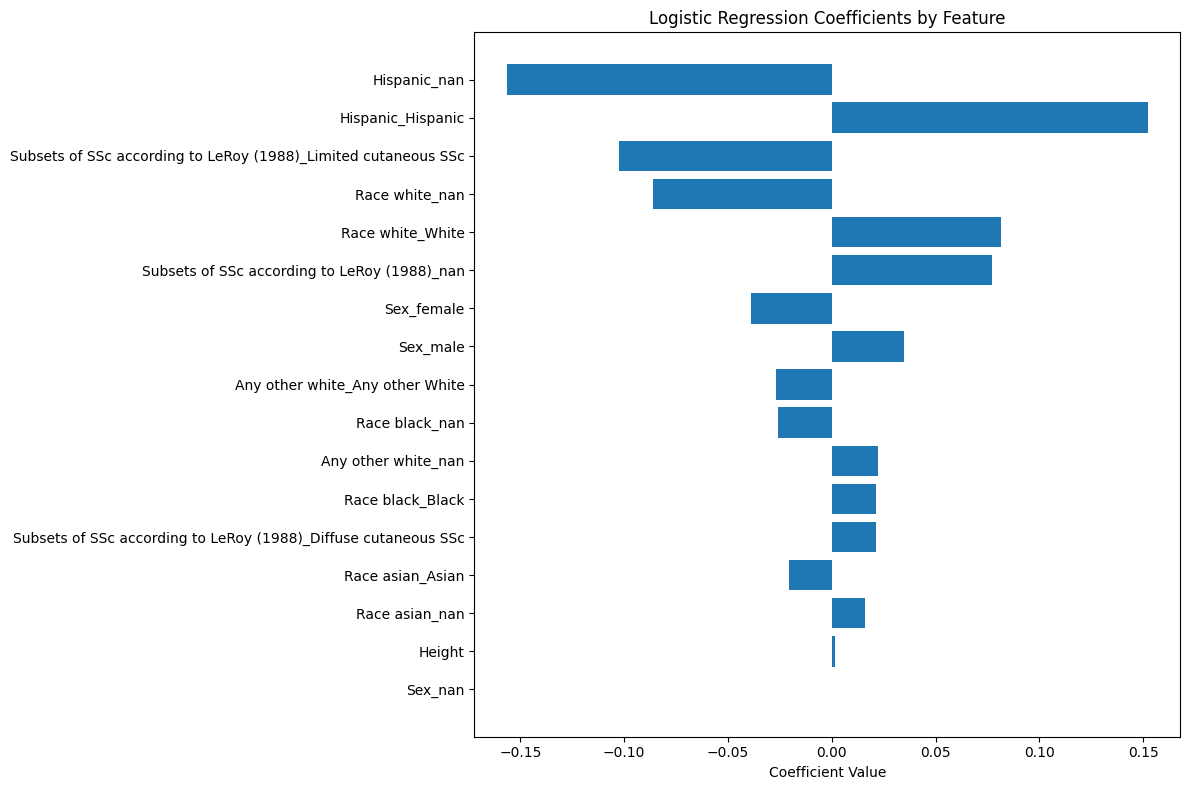

In [23]:
# Sort by absolute value for clarity
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

# Plot
plt.figure(figsize=(12, 8))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel("Coefficient Value")
plt.title("Logistic Regression Coefficients by Feature")
plt.gca().invert_yaxis()  # Highest absolute coefficients at the top
plt.tight_layout()
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.58      0.68      2139
           1       0.25      0.53      0.34       564

    accuracy                           0.57      2703
   macro avg       0.54      0.56      0.51      2703
weighted avg       0.71      0.57      0.61      2703

Accuracy Score: 0.5738068812430632


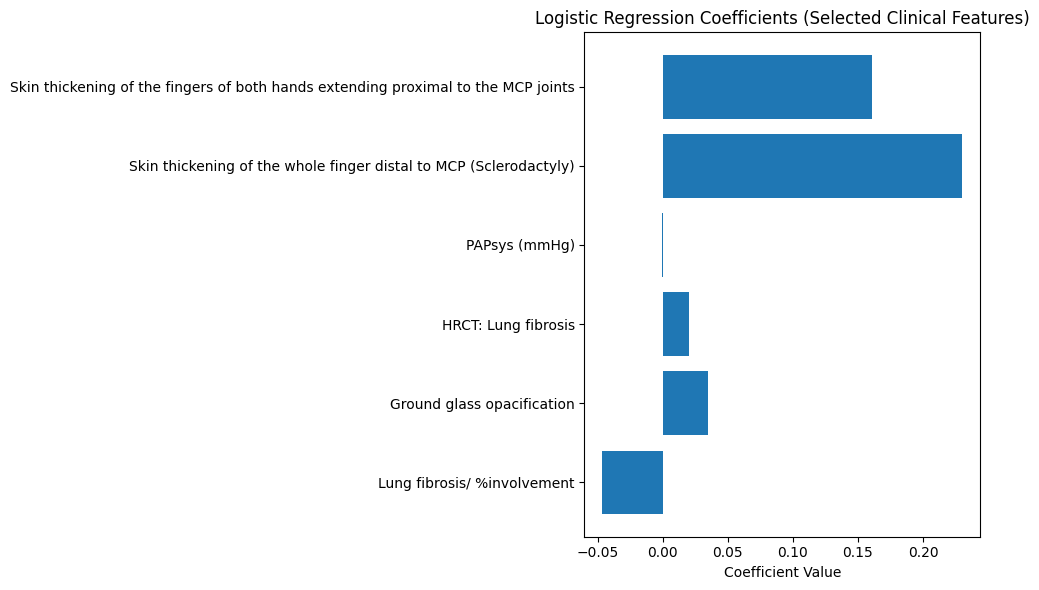

In [39]:
# Replotting the Logistic regression:

# Selecitng the clinically most relevant features
selected_features = [
    'Skin thickening of the fingers of both hands extending proximal to the MCP joints',
    'Skin thickening of the whole finger distal to MCP (Sclerodactyly)',
    'PAPsys (mmHg)',
    'HRCT: Lung fibrosis',
    'Ground glass opacification',
    'Lung fibrosis/ %involvement'
]

# Cleanning and mappping each feautres to numeric values
mappings = { 'Skin thickening of the fingers of both hands extending proximal to the MCP joints': {
        'Never': 0, 'Previously': 1, 'Current': 2 }, 'Skin thickening of the whole finger distal to MCP (Sclerodactyly)': {
        'Never': 0, 'Previously': 1, 'Current': 2}, 'HRCT: Lung fibrosis': {'No': 0, 'Yes': 1, 'Unknown': np.nan},
             'Ground glass opacification': {'No': 0, 'Yes': 1, 'unknown': np.nan},'Lung fibrosis/ %involvement': { '<20%': 1, '>20%': 2, 'Indeterminate': np.nan, 'Unknown': np.nan}}

#Selecing the relvant feautes
reveleatn_model = merged[selected_features + ['Scleroderma present']].copy()

# Applying the mapping
for col, mapping in mappings.items():
    reveleatn_model[col] = reveleatn_model[col].map(mapping)

reveleatn_model = reveleatn_model.dropna(subset=['Scleroderma present'])
X = reveleatn_model[selected_features]
y = reveleatn_model['Scleroderma present']

# Splitting data Training/ test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values (numerical)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

#Training the logsitic regression, accounting for class imbalance
model4= LogisticRegression(max_iter=1000, class_weight='balanced')
model4.fit(X_train_imputed, y_train)

#Predicitng & evaluting the model
y_pred = model4.predict(X_test_imputed)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Plotting the relevant coefficietns
coefficients4 = model.coef_[0]
plt.figure(figsize=(10, 6))
plt.barh(selected_features, coefficients4)
plt.xlabel("Coefficient Value")
plt.title("Logistic Regression Coefficients (Selected Clinical Features)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#Skin thickening of fingers (Proximal to MCP for both hands)
#Skin thickening of fingers (Puffy fingers)
#Skin thickening of fingers (Sclerodactyly distal to MCP)
#Fingertip Lesions (Digital Ulcers or Pitting Scars)
#Telangiectasia
# Raynaud’s
# SC specific autoantibody
# Pulmonary arterial hypertension/ interstitial-lung disease
# Abnormal nail-fold capillarie

In [ ]:
#Building the RNN model
#RNN can model how changes over time in these features relate to the future or current development of Screlmona.